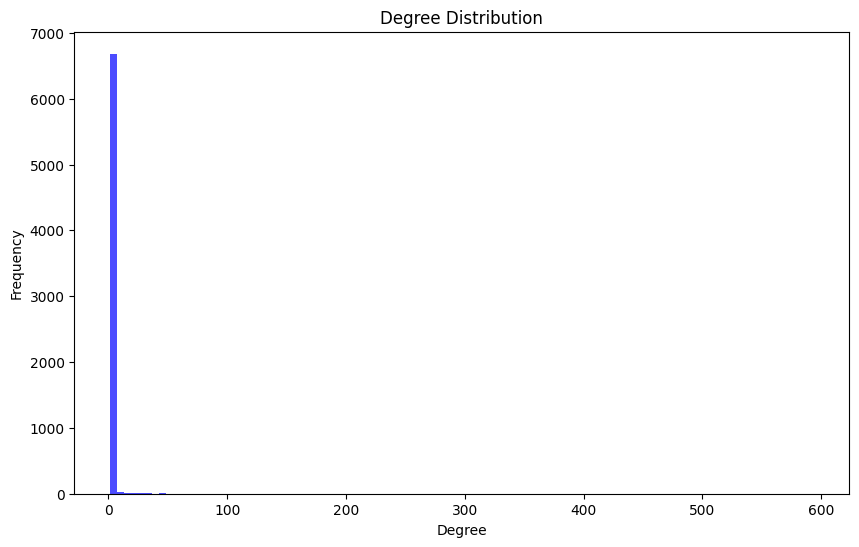

basic_stats
{'Number of nodes': 6788, 'Number of edges': 7856, 'Density': 0.0003410450791614424, 'Transitivity': 0}
average clustering coefficient
0.0
top 10 betweeness
[(16786, 0.20717828180747708), (92213, 0.1298476960937849), (138744, 0.1179687362840993), (45636, 0.11174109433427667), (83079, 0.10425186294062701), (32338, 0.09670871545898448), (122612, 0.09459532122501184), (66515, 0.09225980368115773), (149223, 0.08663456916834204), (24153, 0.07723947368166412)]
number of communities
41


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Load the datasets
edges = pd.read_csv("C:/Users/pyo20/OneDrive/Desktop/Classes/IEMS341/Project/random_island_edges.csv")
features = pd.read_csv("C:/Users/pyo20/OneDrive/Desktop/Classes/IEMS341/Project/random_island_features.csv")

# Create a graph
G = nx.from_pandas_edgelist(edges, source='numeric_id_1', target='numeric_id_2')

# Basic network statistics
basic_stats = {
    "Number of nodes": G.number_of_nodes(),
    "Number of edges": G.number_of_edges(),
    "Density": nx.density(G),
    "Transitivity": nx.transitivity(G)
}

# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Clustering coefficient
clustering_coeffs = nx.clustering(G)
avg_clustering_coeff = sum(clustering_coeffs.values()) / len(clustering_coeffs)

# Centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Top 10 nodes by betweenness centrality
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Community detection using Louvain method
communities = community.louvain_communities(G)
num_communities = len(communities)

# Plot Degree Distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=100, color='blue', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Results
print("basic_stats")
print(basic_stats)
print("average clustering coefficient")
print(avg_clustering_coeff)
print("top 10 betweeness")
print(top_10_betweenness)
print("number of communities")
print(num_communities)


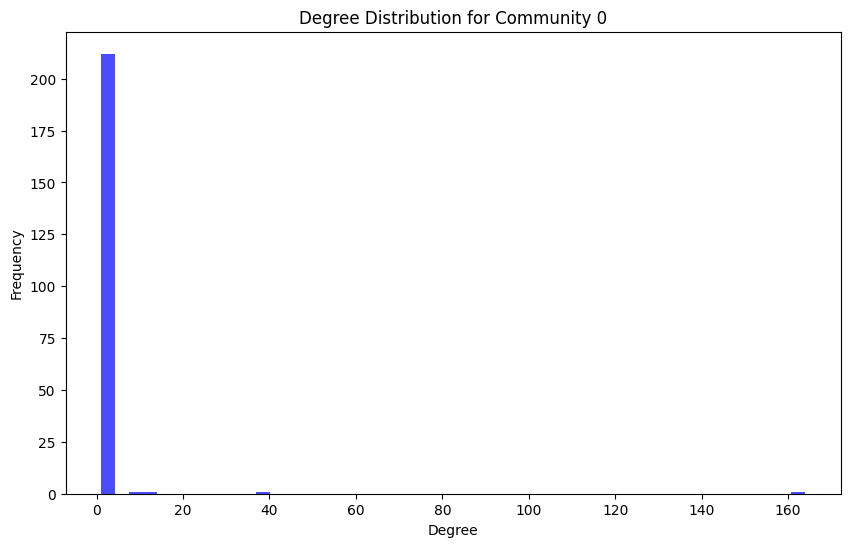

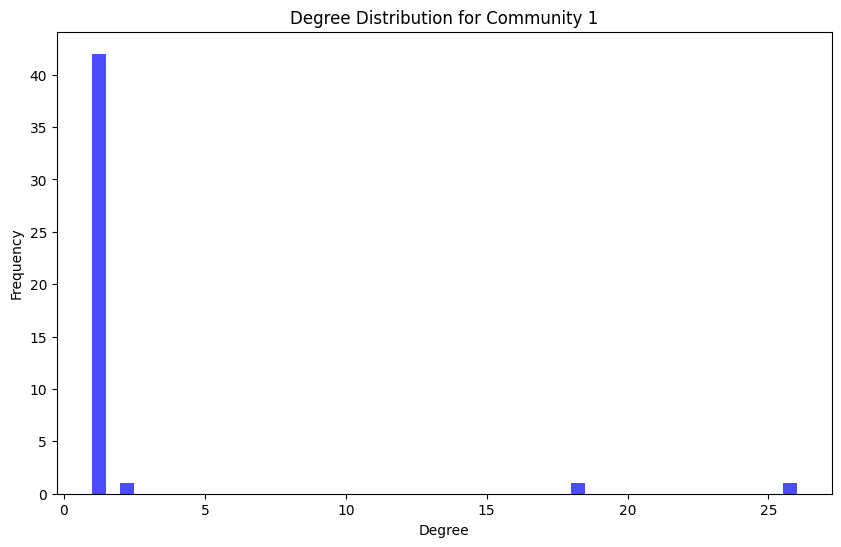

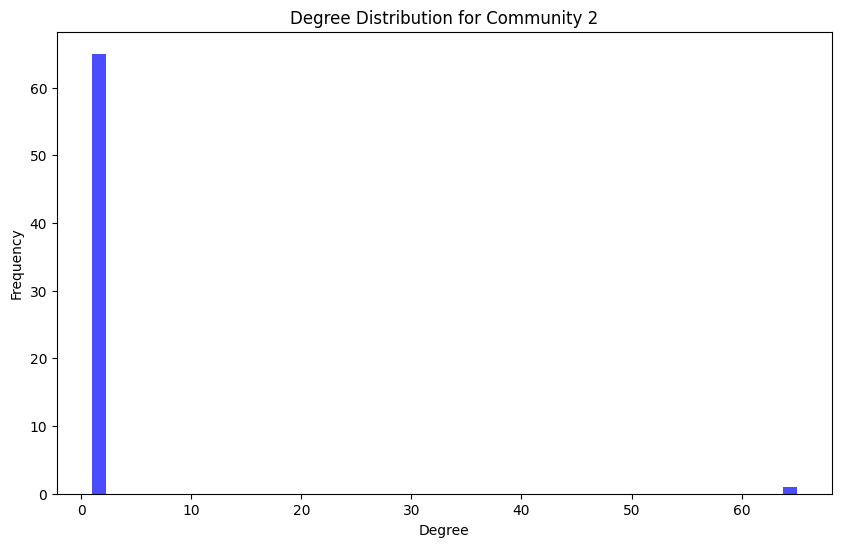

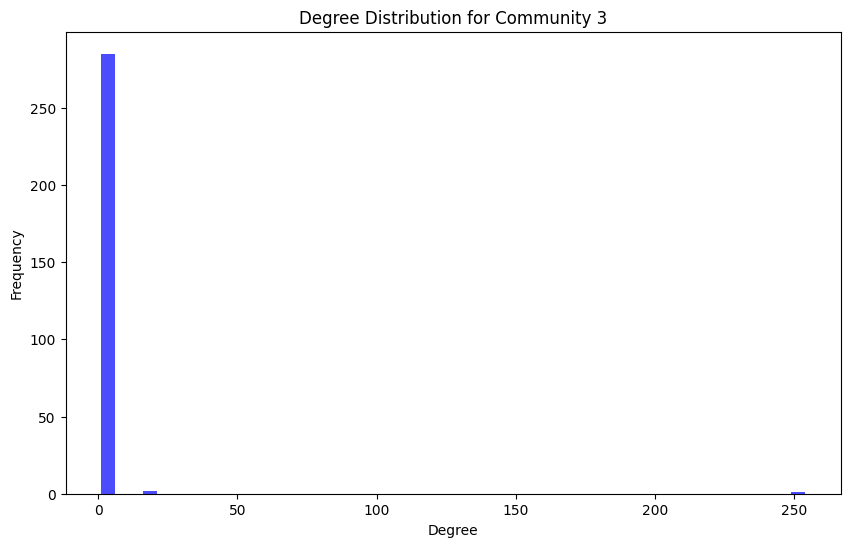

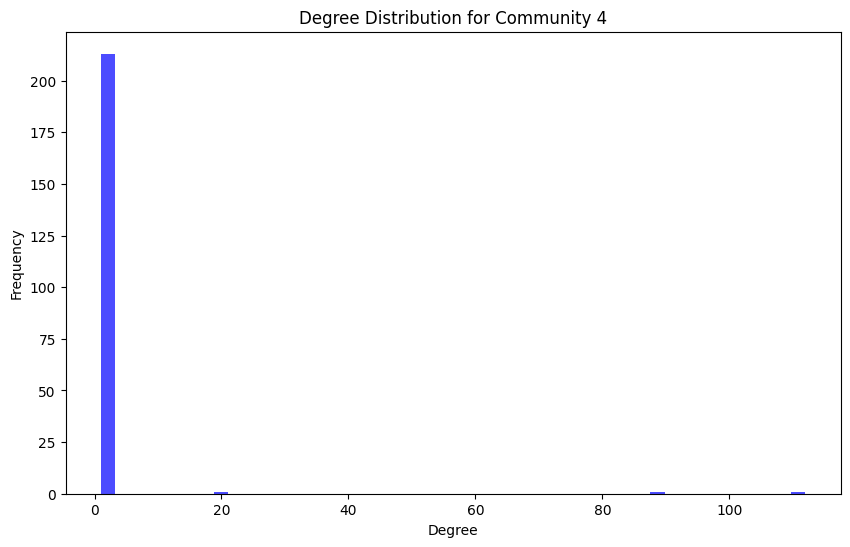

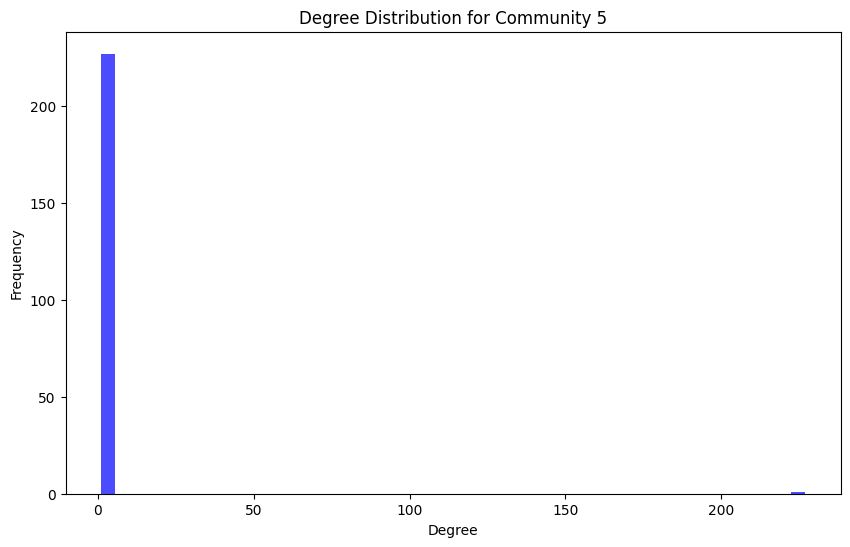

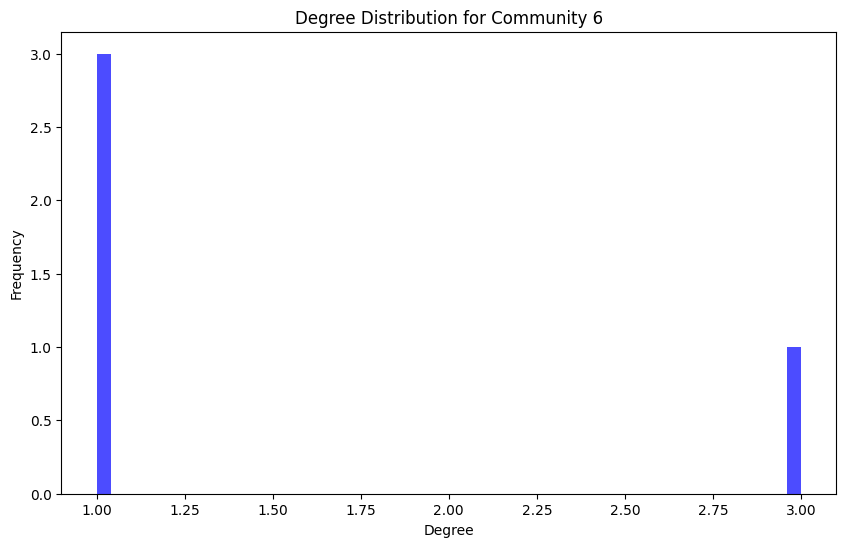

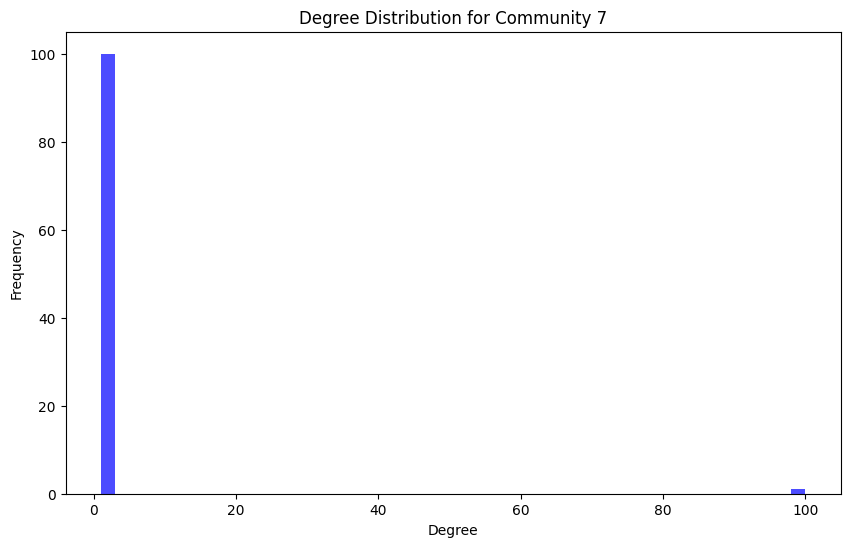

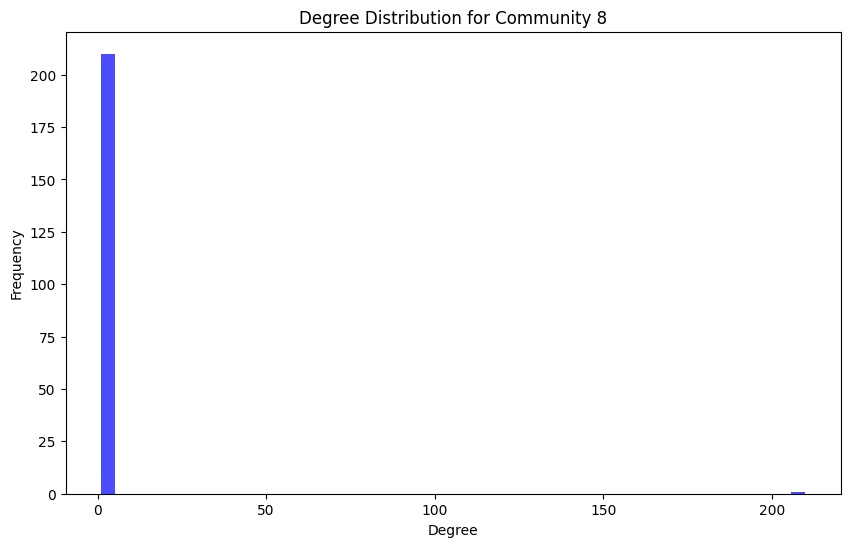

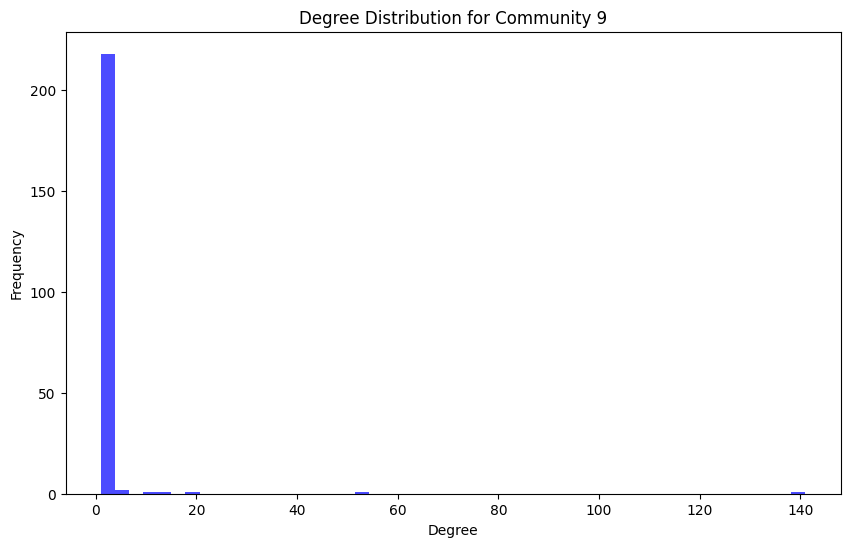

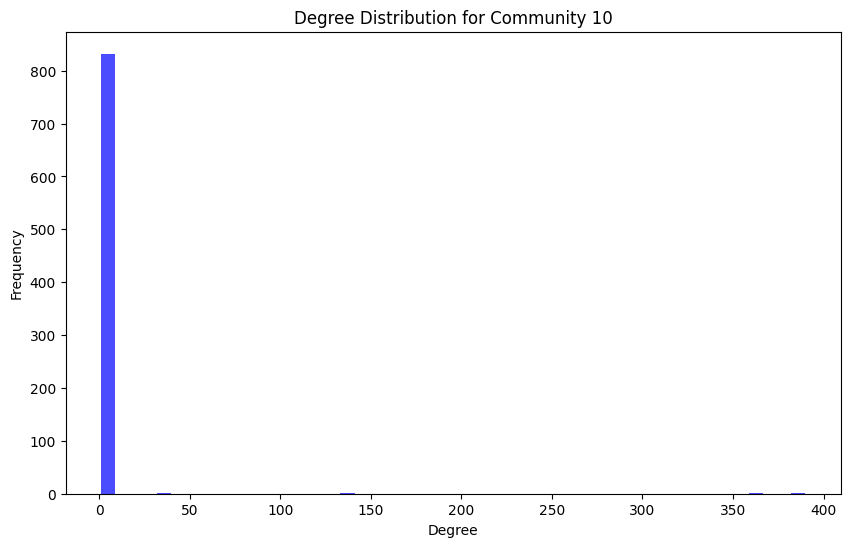

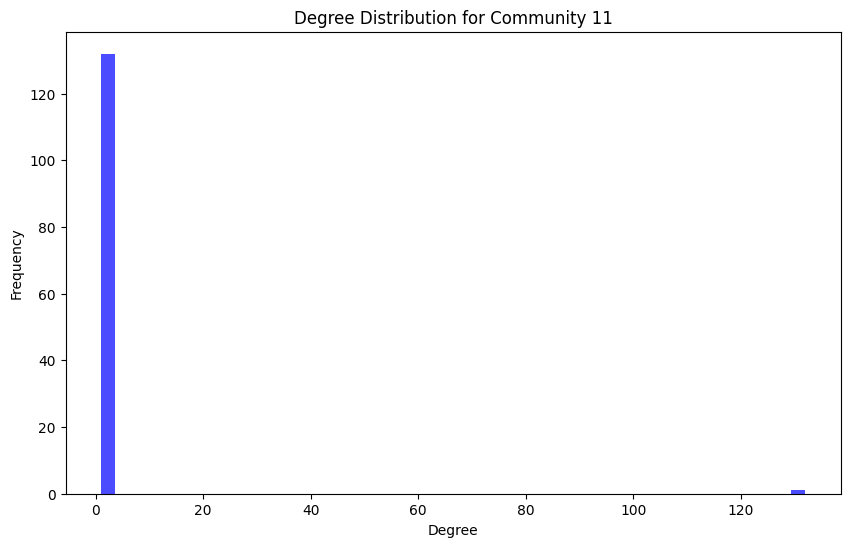

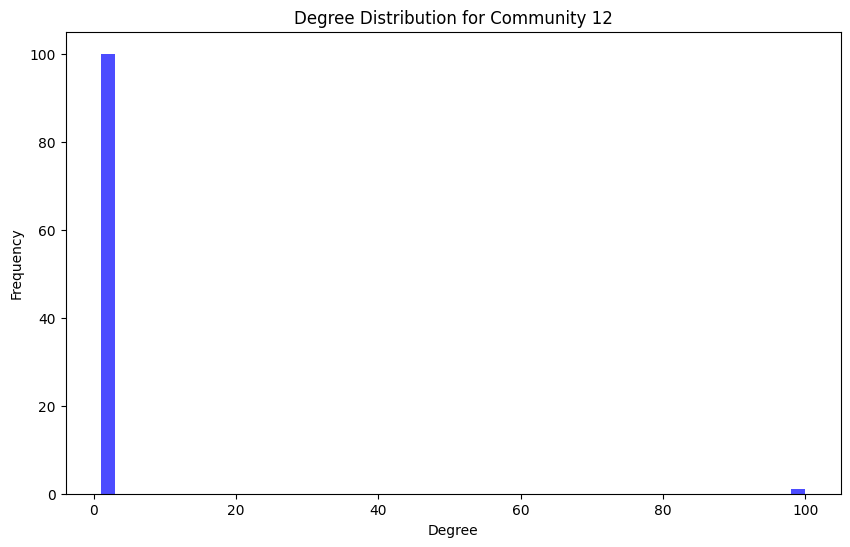

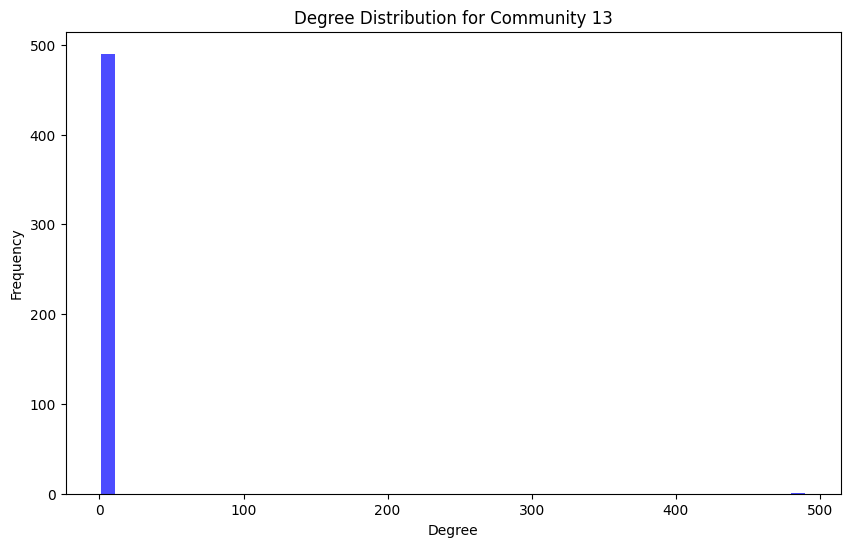

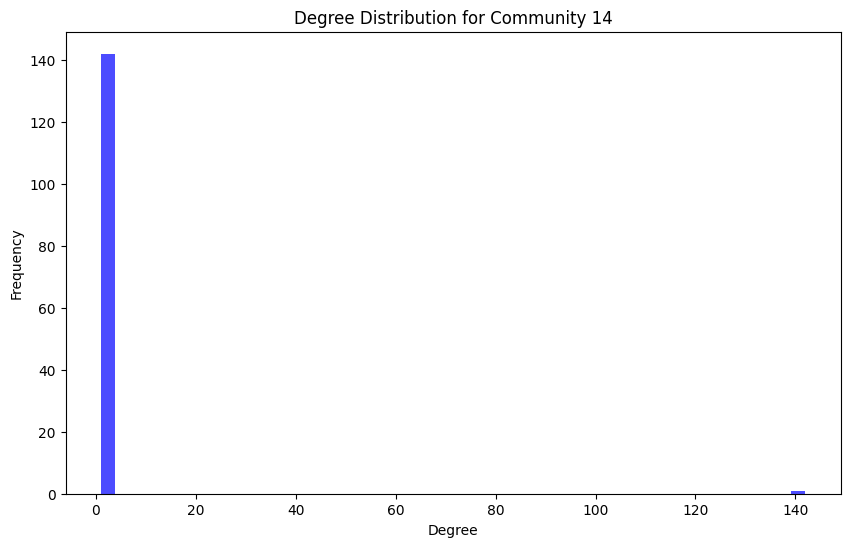

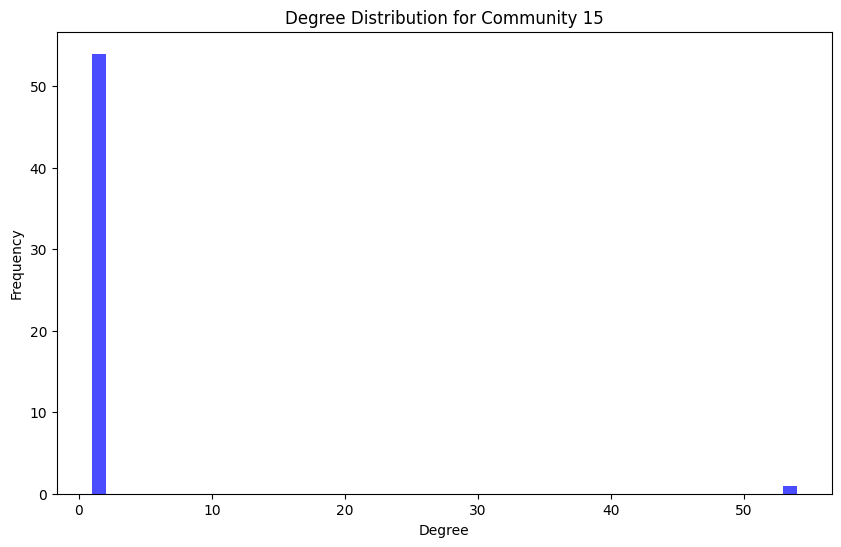

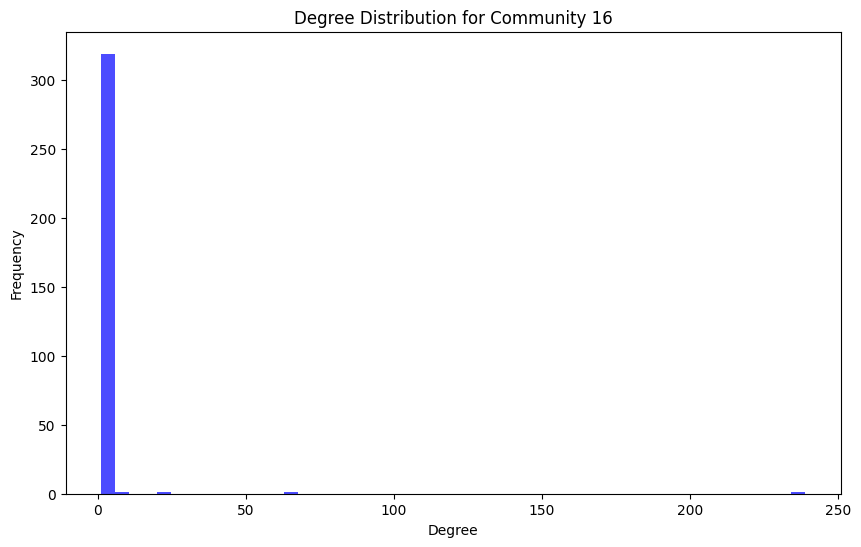

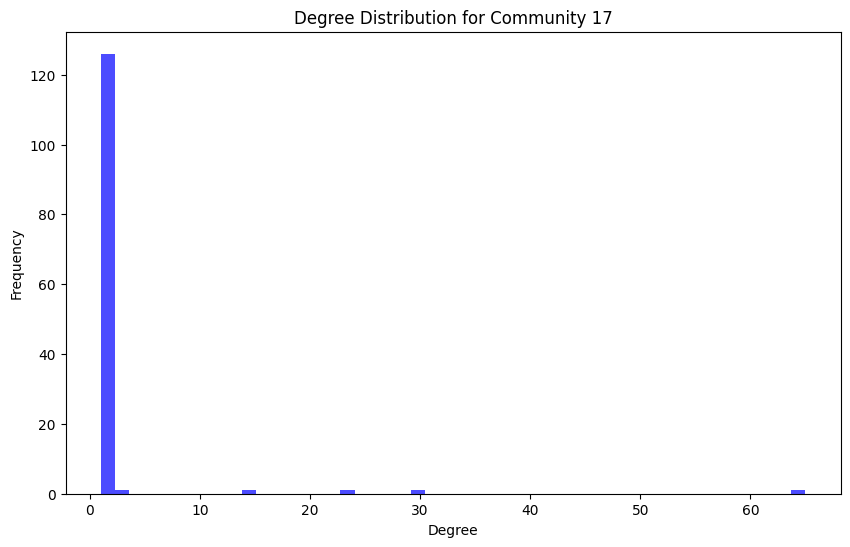

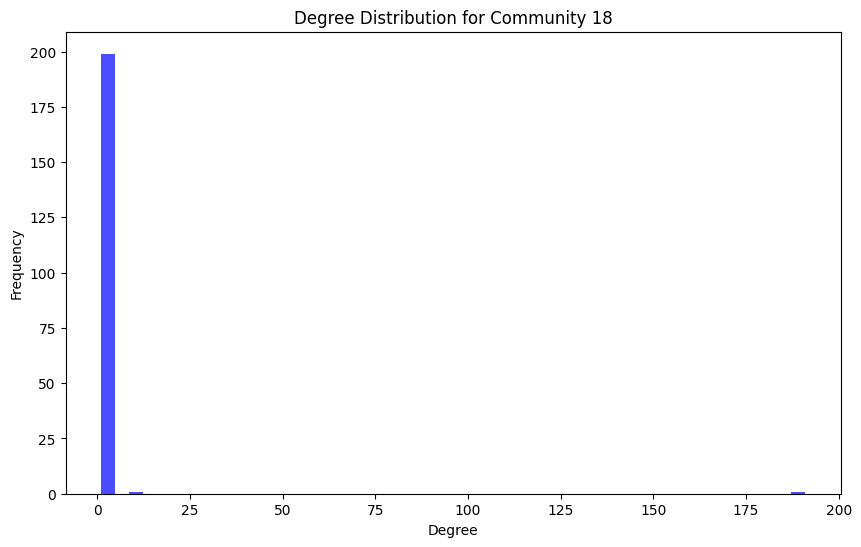

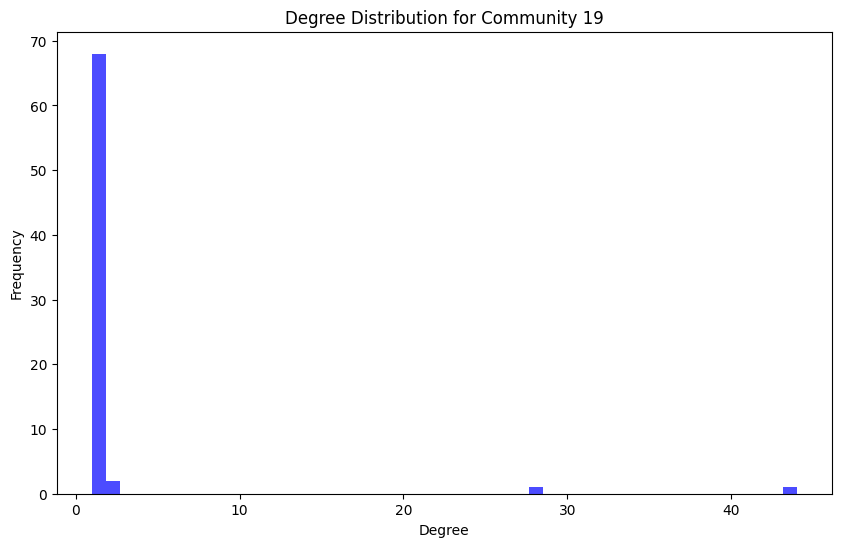

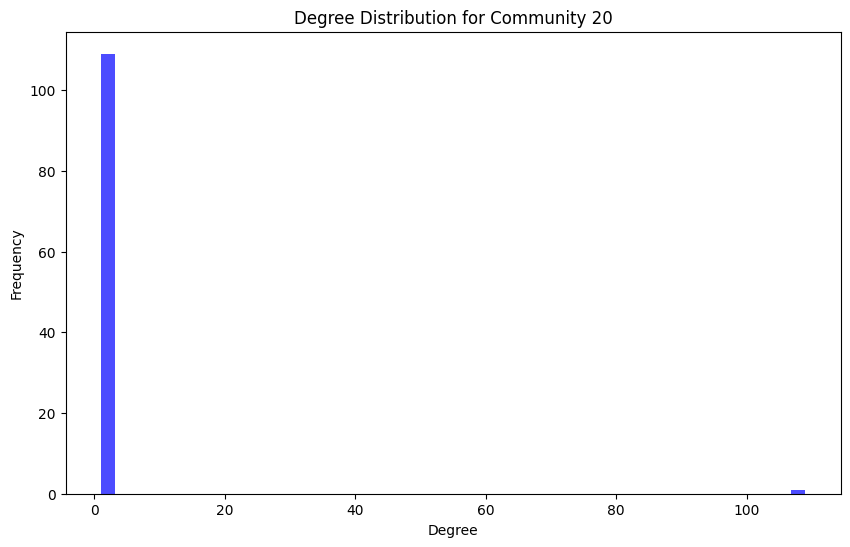

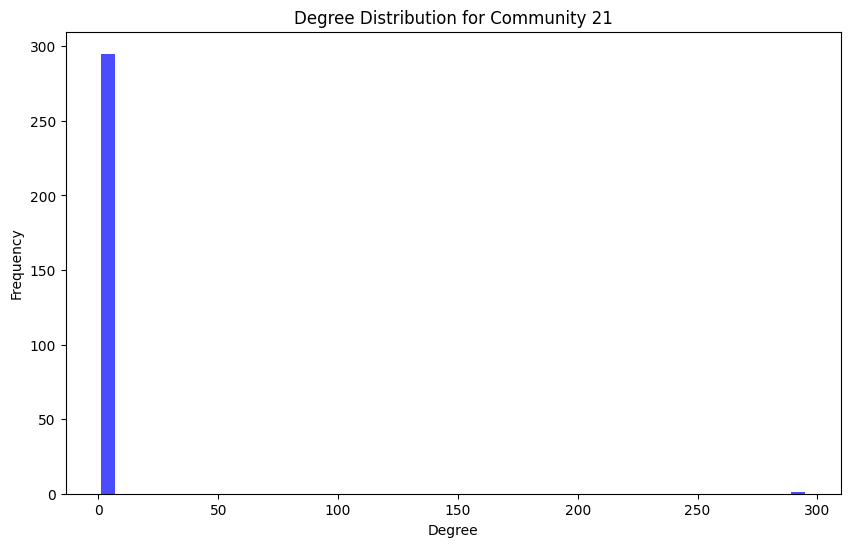

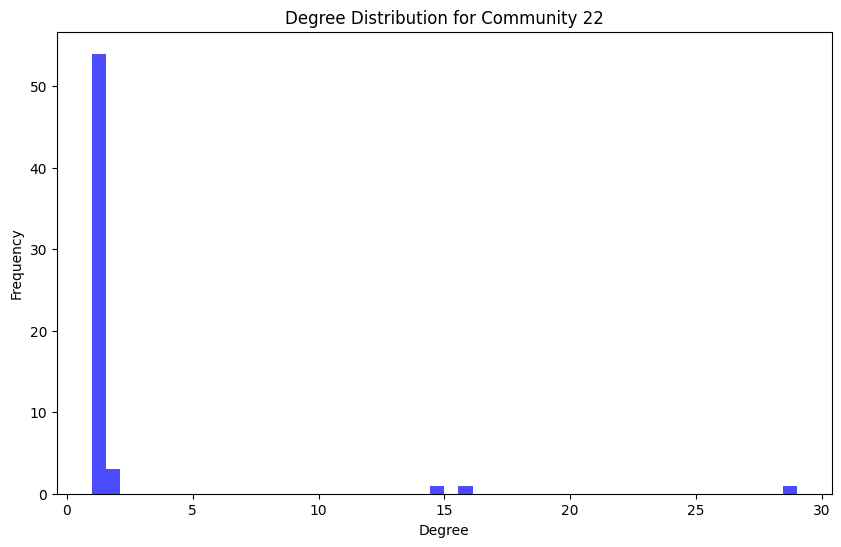

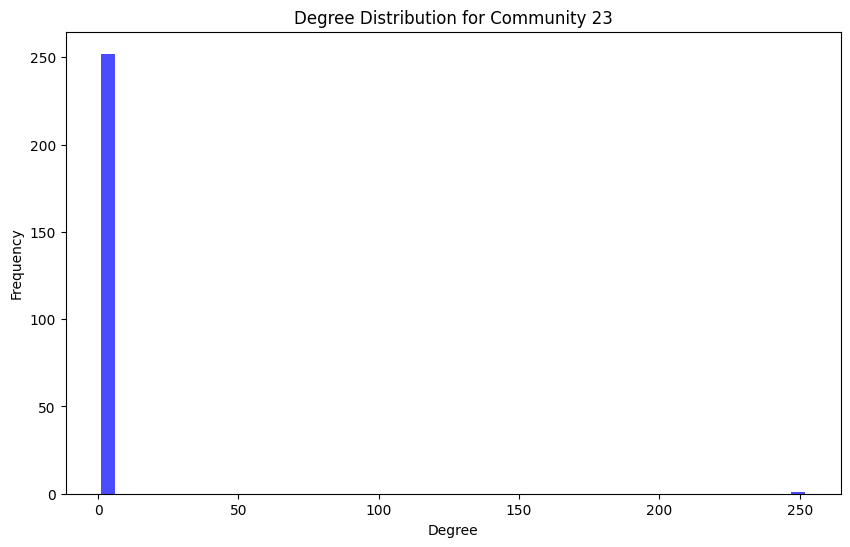

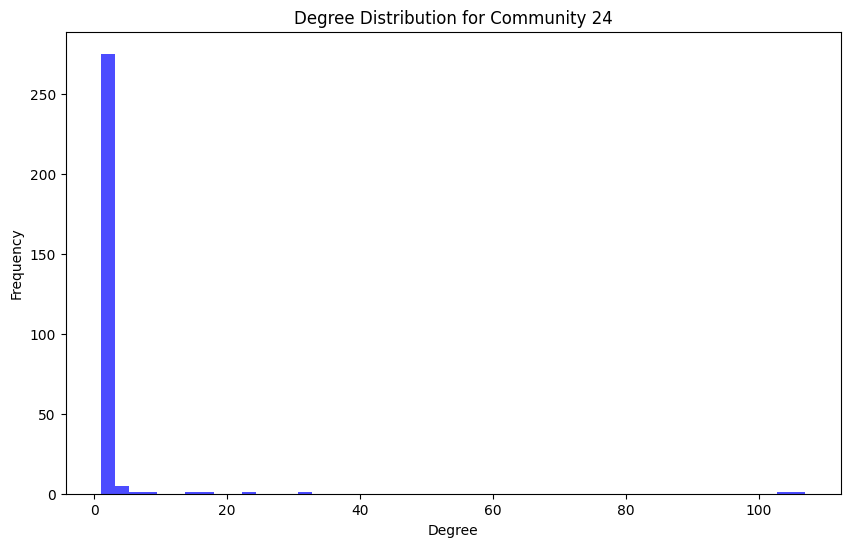

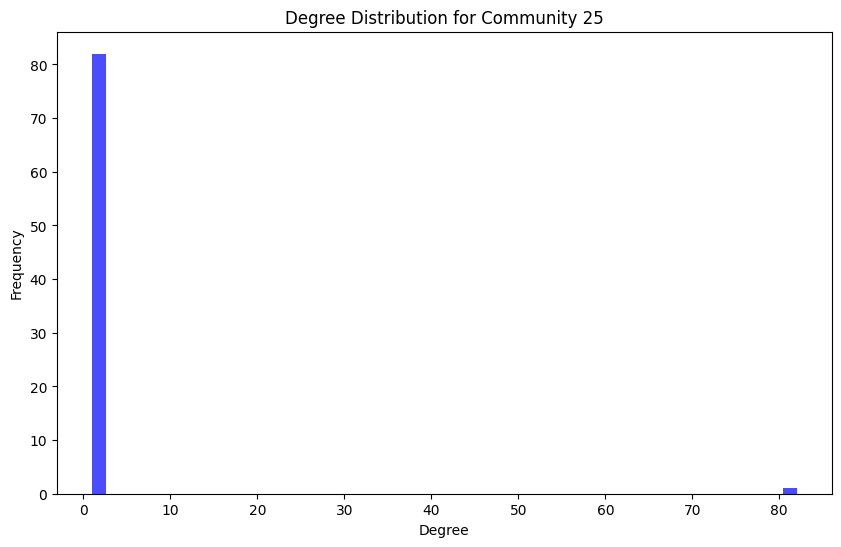

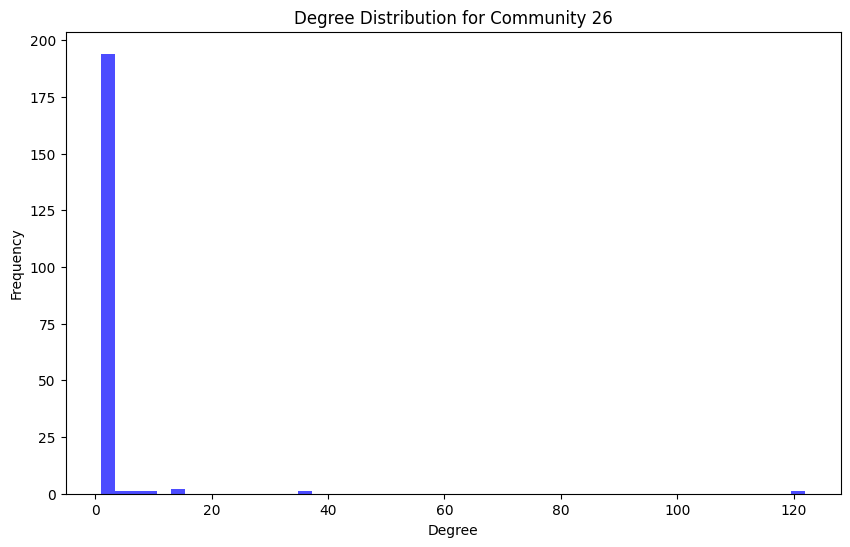

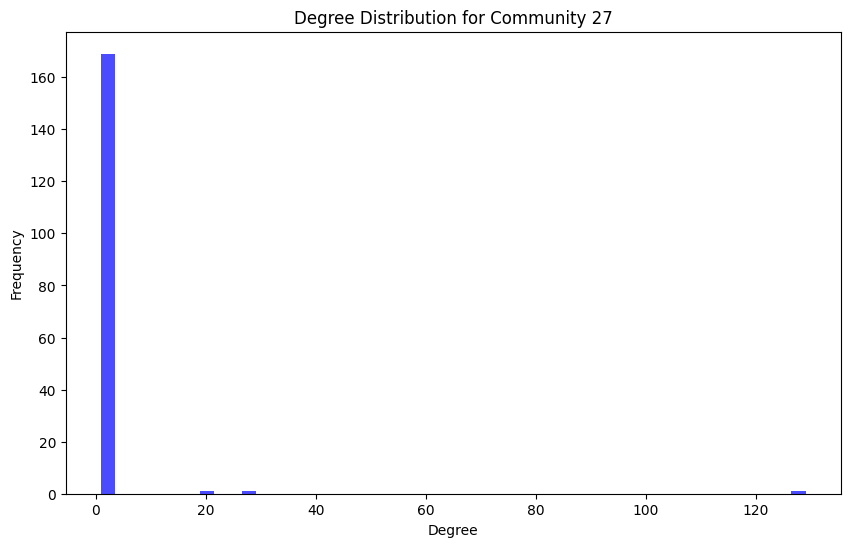

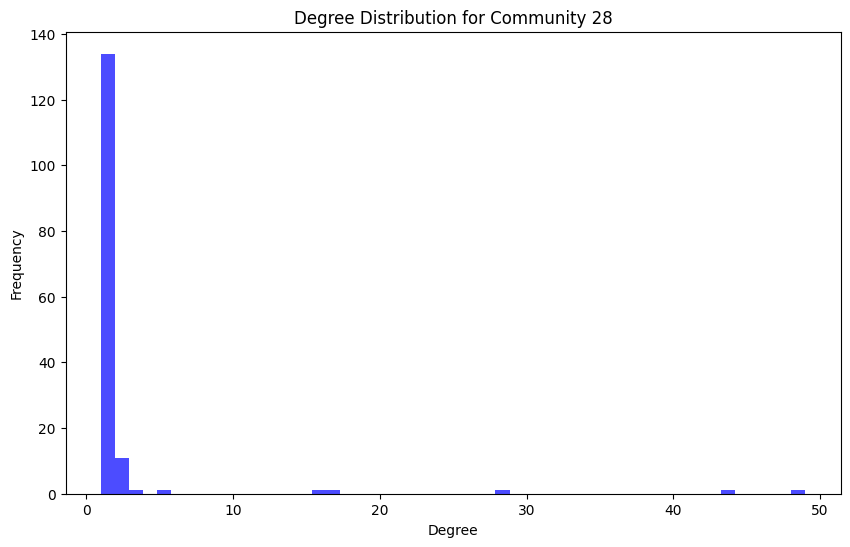

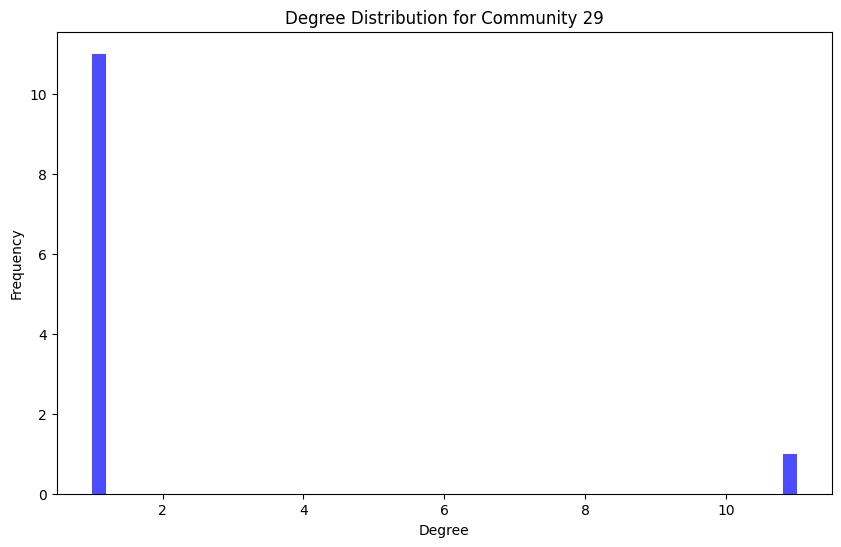

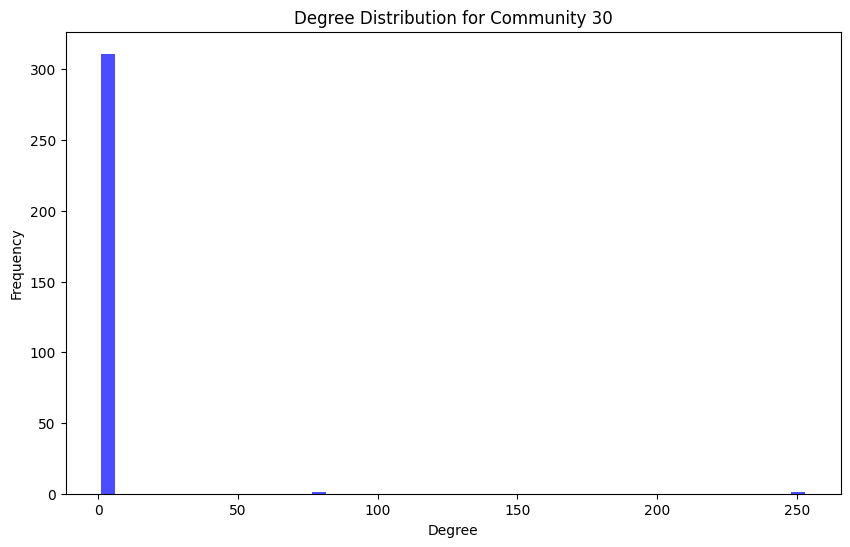

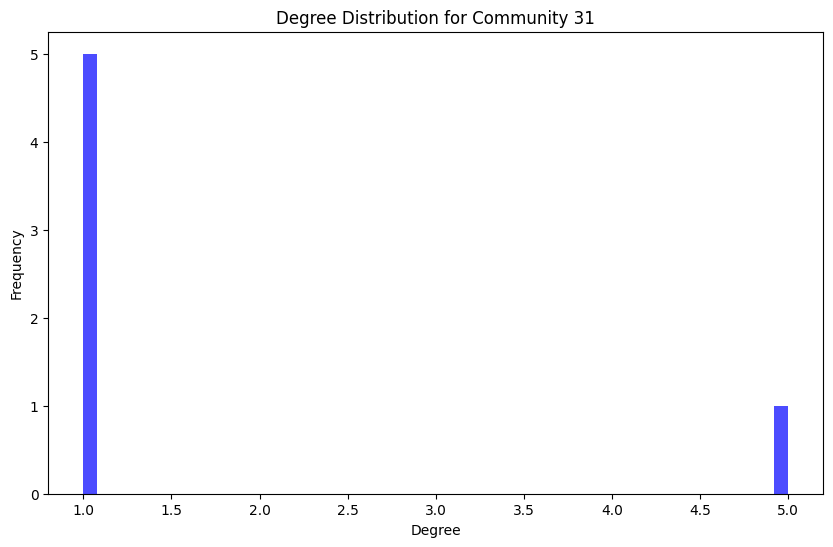

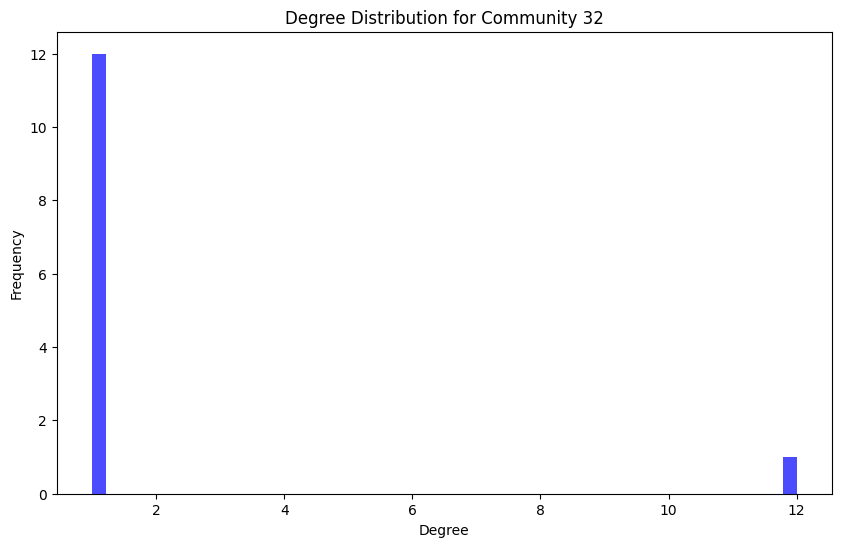

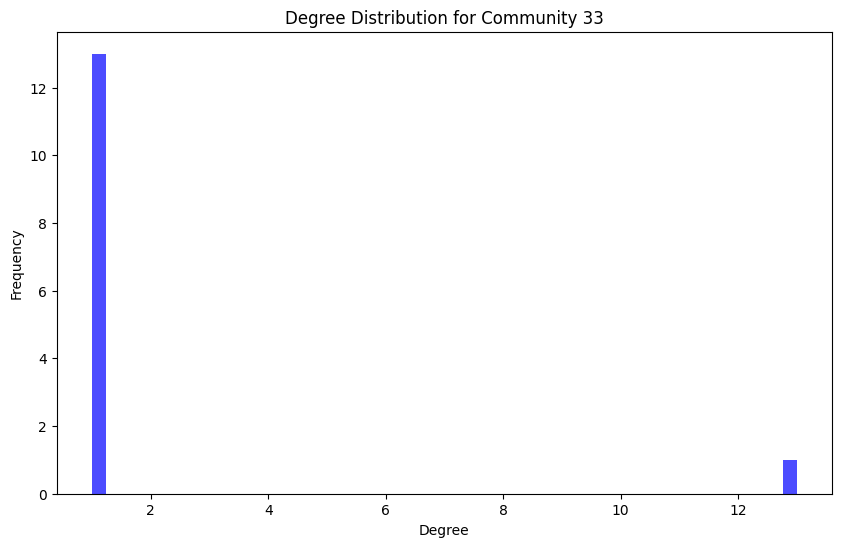

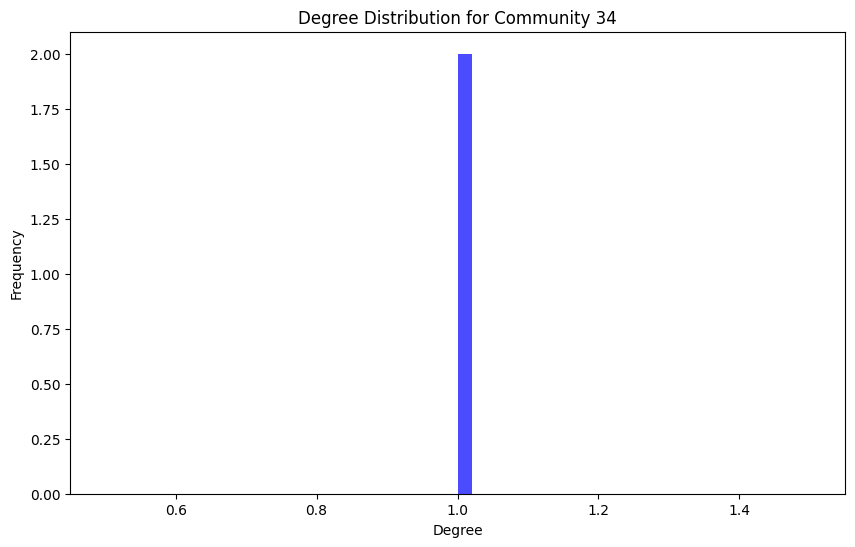

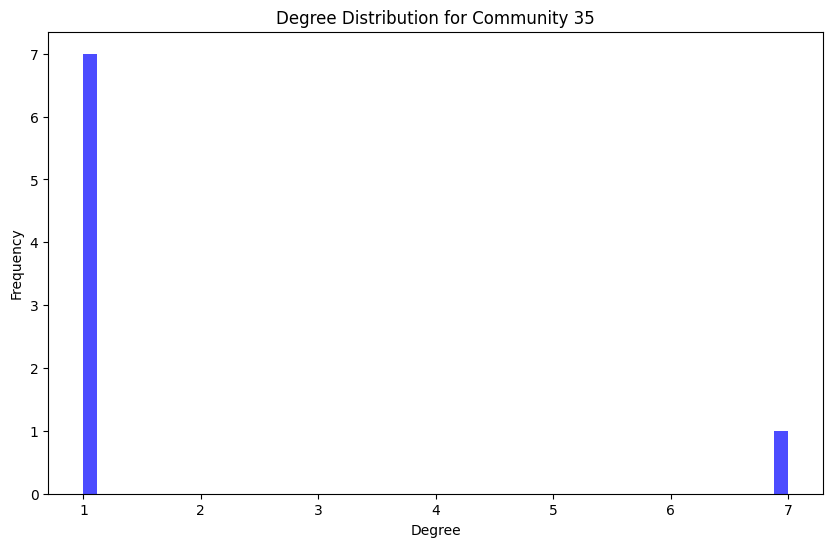

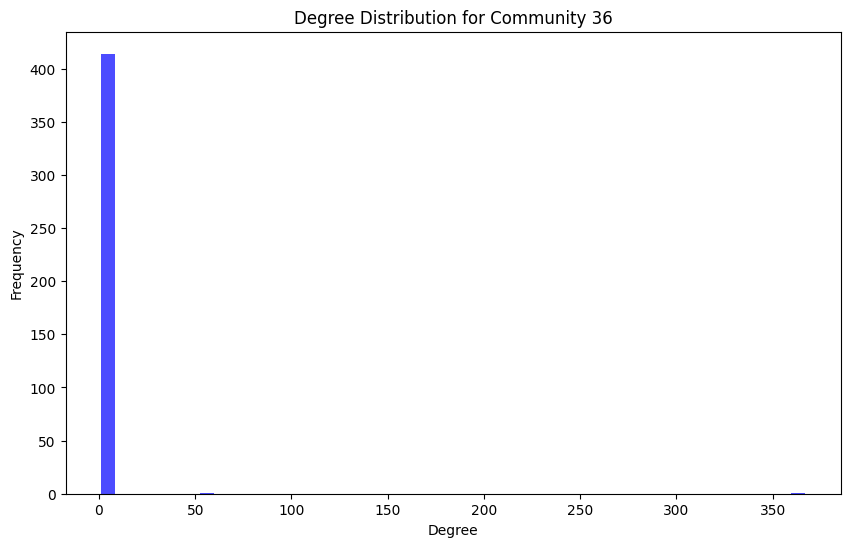

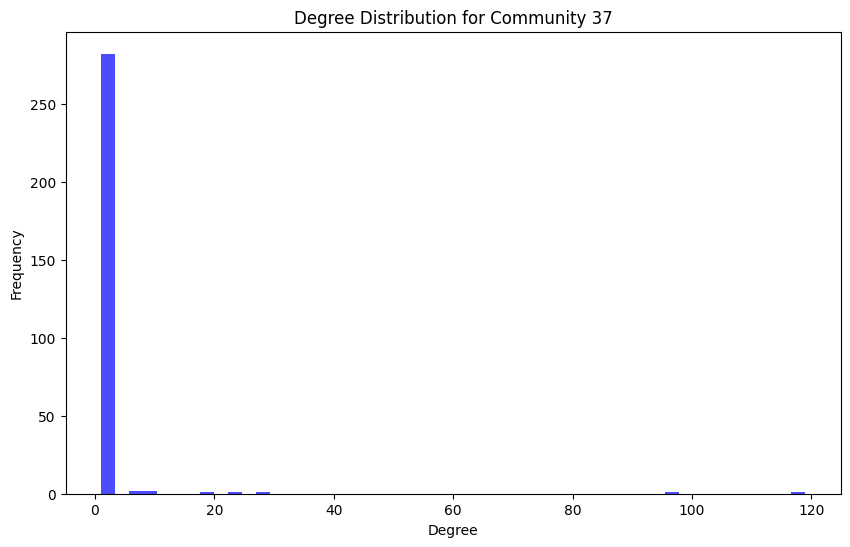

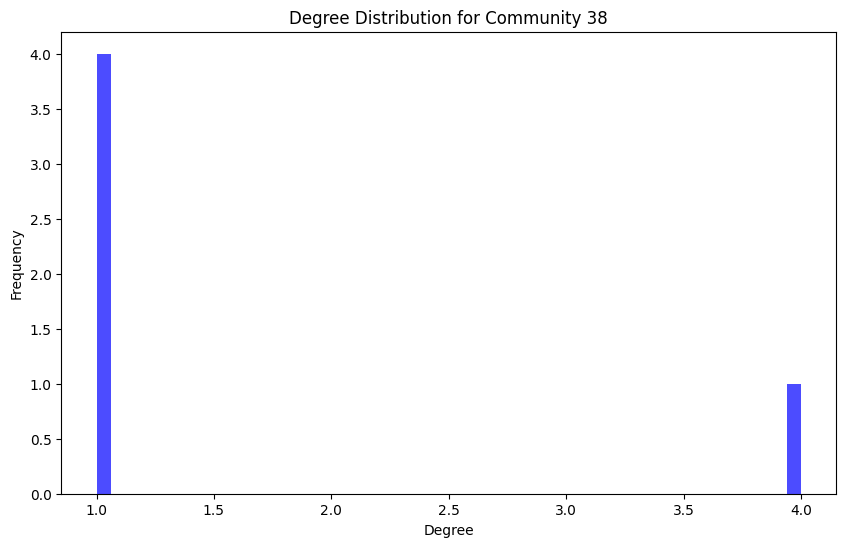

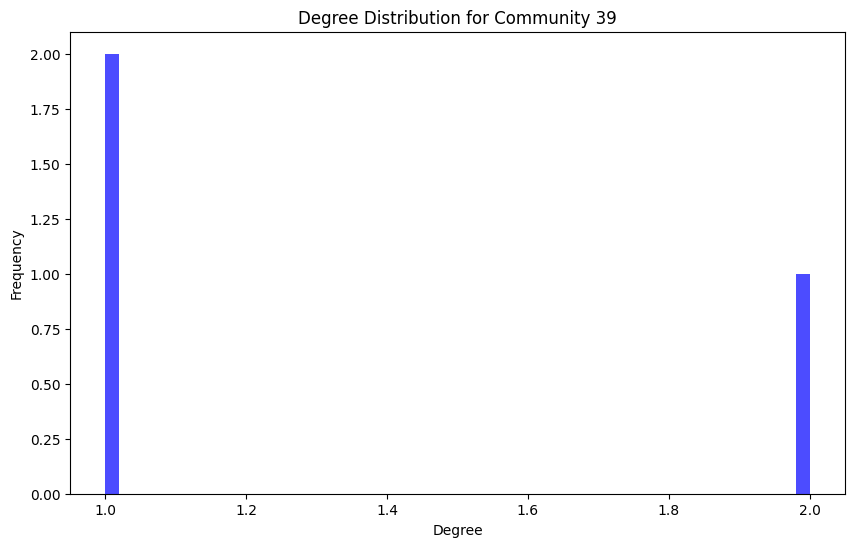

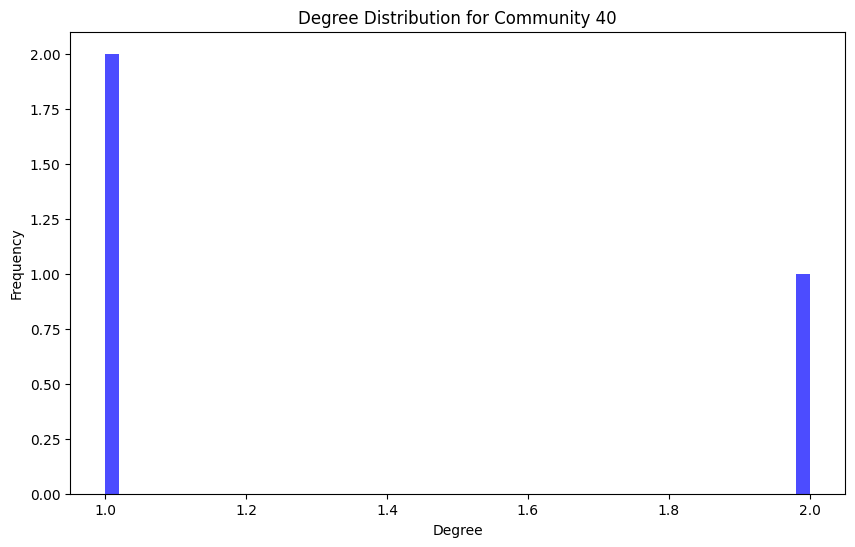

({0: 216,
  1: 45,
  2: 66,
  3: 288,
  4: 216,
  5: 228,
  6: 4,
  7: 101,
  8: 211,
  9: 225,
  10: 837,
  11: 133,
  12: 101,
  13: 491,
  14: 143,
  15: 55,
  16: 323,
  17: 131,
  18: 201,
  19: 72,
  20: 110,
  21: 296,
  22: 60,
  23: 253,
  24: 288,
  25: 83,
  26: 201,
  27: 172,
  28: 152,
  29: 12,
  30: 313,
  31: 6,
  32: 13,
  33: 14,
  34: 2,
  35: 8,
  36: 416,
  37: 291,
  38: 5,
  39: 3,
  40: 3},
 {0: [(88717, 0.9272027820039118),
   (114257, 0.3214617375669314),
   (154333, 0.08482819940329207),
   (127043, 0.07198435122799392),
   (10097, 0.06617250531834318),
   (46533, 0.06420343403607912),
   (107672, 0.051464503764003716),
   (161362, 0.03294679022346917),
   (91431, 0.03294679022346917),
   (126773, 0.03294679022346917)],
  1: [(158601, 0.8192389006342495),
   (165276, 0.6289640591966174),
   (61862, 0.49471458773784355),
   (93184, 0.0),
   (162817, 0.0),
   (4993, 0.0),
   (5507, 0.0),
   (89733, 0.0),
   (48142, 0.0),
   (49807, 0.0)],
  2: [(62735, 1.0),
 

In [6]:
# Assign community labels to nodes
community_map = {}
for i, com in enumerate(communities):
    for node in com:
        community_map[node] = i
nx.set_node_attributes(G, community_map, 'community')

# Analyze the size of each community
community_sizes = {i: len(com) for i, com in enumerate(communities)}

# Examine degree distribution within each community
degree_distributions = {}
for i in range(num_communities):
    subgraph = G.subgraph(communities[i])
    degree_sequence = sorted([d for n, d in subgraph.degree()], reverse=True)
    degree_distributions[i] = degree_sequence

# Identify the top nodes by centrality measures within each community
top_nodes_by_community = {}
for i in range(num_communities):
    subgraph = G.subgraph(communities[i])
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_nodes_by_community[i] = top_10_betweenness

# Plot degree distribution for each community
for i, degree_sequence in degree_distributions.items():
    plt.figure(figsize=(10, 6))
    plt.hist(degree_sequence, bins=50, color='blue', alpha=0.7)
    plt.title(f'Degree Distribution for Community {i}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# Results
community_sizes, top_nodes_by_community

In [7]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

features['community'] = features['numeric_id'].map(community_map)
features['degree'] = features['numeric_id'].map(dict(G.degree()))
features['betweenness_centrality'] = features['numeric_id'].map(nx.betweenness_centrality(G))
features['closeness_centrality'] = features['numeric_id'].map(nx.closeness_centrality(G))
features['eigenvector_centrality'] = features['numeric_id'].map(nx.eigenvector_centrality(G, max_iter=1000))

# Prepare the target variable (assuming 'explicit_content' is the target column)
target = 'mature'
X = features.drop(columns=['numeric_id', target])
y = features[target]

# Convert non-numeric features to numeric codes
X = X.apply(lambda col: pd.Categorical(col).codes if col.dtype == 'object' else col)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Results
accuracy

report


'              precision    recall  f1-score   support\n\n           0       0.61      0.63      0.62      1015\n           1       0.62      0.60      0.61      1022\n\n    accuracy                           0.61      2037\n   macro avg       0.61      0.61      0.61      2037\nweighted avg       0.61      0.61      0.61      2037\n'

In [8]:
# Prepare the node features
features['community'] = features['numeric_id'].map(community_map)
features['degree'] = features['numeric_id'].map(dict(G.degree()))
features['betweenness_centrality'] = features['numeric_id'].map(nx.betweenness_centrality(G))
features['closeness_centrality'] = features['numeric_id'].map(nx.closeness_centrality(G))
features['eigenvector_centrality'] = features['numeric_id'].map(nx.eigenvector_centrality(G, max_iter=1000))

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features.select_dtypes(include=[np.number]))
features_imputed_df = pd.DataFrame(features_imputed, columns=features.select_dtypes(include=[np.number]).columns)

# Analyze common attributes in each community
community_attributes = features_imputed_df.groupby('community').mean()

# Results
community_attributes


,Unnamed: 0,views,mature,life_time,numeric_id,dead_account,affiliate,degree,betweenness_centrality,closeness_centrality,eigenvector_centrality
community,,,,,,,,,,,
0.0,85804.319444,6.437704e+06,0.527778,2057.375000,85803.319444,0.000000,0.365741,2.569444,5.677769e-04,0.230797,2.067384e-03
1.0,81608.466667,9.804731e+06,0.555556,1390.622222,81607.466667,0.000000,0.688889,2.400000,1.862585e-03,0.196590,1.128853e-03
2.0,81061.000000,4.186905e+05,0.712121,1409.636364,81060.000000,0.000000,0.742424,2.227273,3.957329e-04,0.207966,1.884639e-03
3.0,84179.097222,4.403947e+06,0.343750,1702.590278,84178.097222,0.000000,0.361111,2.277778,4.901168e-04,0.234701,2.314590e-03
4.0,86542.236111,2.305008e+06,0.550926,1917.194444,86541.236111,0.004630,0.486111,2.259259,4.334300e-04,0.214714,5.390383e-04
5.0,80143.557018,1.205413e+06,0.500000,1539.285088,80142.557018,0.000000,0.473684,2.280702,4.765744e-04,0.227789,1.803382e-03
6.0,99860.750000,1.247412e+05,0.250000,1578.500000,99859.750000,0.250000,0.250000,1.500000,3.256863e-08,0.000309,4.635621e-107
7.0,88972.009901,9.040900e+05,0.683168,1457.346535,88971.009901,0.000000,0.712871,2.207921,5.977579e-04,0.227640,9.383122e-04
8.0,84760.251185,1.078000e+05,0.696682,1522.161137,84759.251185,0.009479,0.616114,2.208531,5.380843e-04,0.202162,1.715221e-03


In [9]:
import random

# Step 2: Simplified Influential User Identification
# Identify the most influential users by degree and closeness centrality within each community
top_influential_users = {}
for i in range(len(communities)):
    subgraph = G.subgraph(communities[i])
    top_degree = sorted(subgraph.degree, key=lambda x: x[1], reverse=True)[:5]
    top_closeness = sorted(nx.closeness_centrality(subgraph).items(), key=lambda x: x[1], reverse=True)[:5]
    
    top_influential_users[i] = {
        'top_degree': top_degree,
        'top_closeness': top_closeness
    }

# Step 3: Simulating Information Propagation
def independent_cascade_model(G, seeds, steps=3):
    # Initialize the set of active nodes
    active = set(seeds)
    # Record the active nodes in each step
    activation_steps = [set(seeds)]
    
    for step in range(steps):
        new_active = set()
        for node in activation_steps[-1]:
            neighbors = set(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in active and random.random() < 0.1:  # Probability of influence
                    new_active.add(neighbor)
        activation_steps.append(new_active)
        active.update(new_active)
    
    return activation_steps

# Simulate information propagation from top nodes in each community
information_propagation = {}
for i in range(len(communities)):
    top_node = top_influential_users[i]['top_degree'][0][0]  # Using top degree node as seed
    propagation_steps = independent_cascade_model(G.subgraph(communities[i]), [top_node])
    information_propagation[i] = propagation_steps

# Results
community_attributes, top_influential_users, information_propagation


(              Unnamed: 0         views    mature    life_time     numeric_id  \
 community                                                                      
 0.0         85804.319444  6.437704e+06  0.527778  2057.375000   85803.319444   
 1.0         81608.466667  9.804731e+06  0.555556  1390.622222   81607.466667   
 2.0         81061.000000  4.186905e+05  0.712121  1409.636364   81060.000000   
 3.0         84179.097222  4.403947e+06  0.343750  1702.590278   84178.097222   
 4.0         86542.236111  2.305008e+06  0.550926  1917.194444   86541.236111   
 5.0         80143.557018  1.205413e+06  0.500000  1539.285088   80142.557018   
 6.0         99860.750000  1.247412e+05  0.250000  1578.500000   99859.750000   
 7.0         88972.009901  9.040900e+05  0.683168  1457.346535   88971.009901   
 8.0         84760.251185  1.078000e+05  0.696682  1522.161137   84759.251185   
 9.0         80634.693333  1.298884e+06  0.431111  2008.404444   80633.693333   
 10.0        84389.591398  1

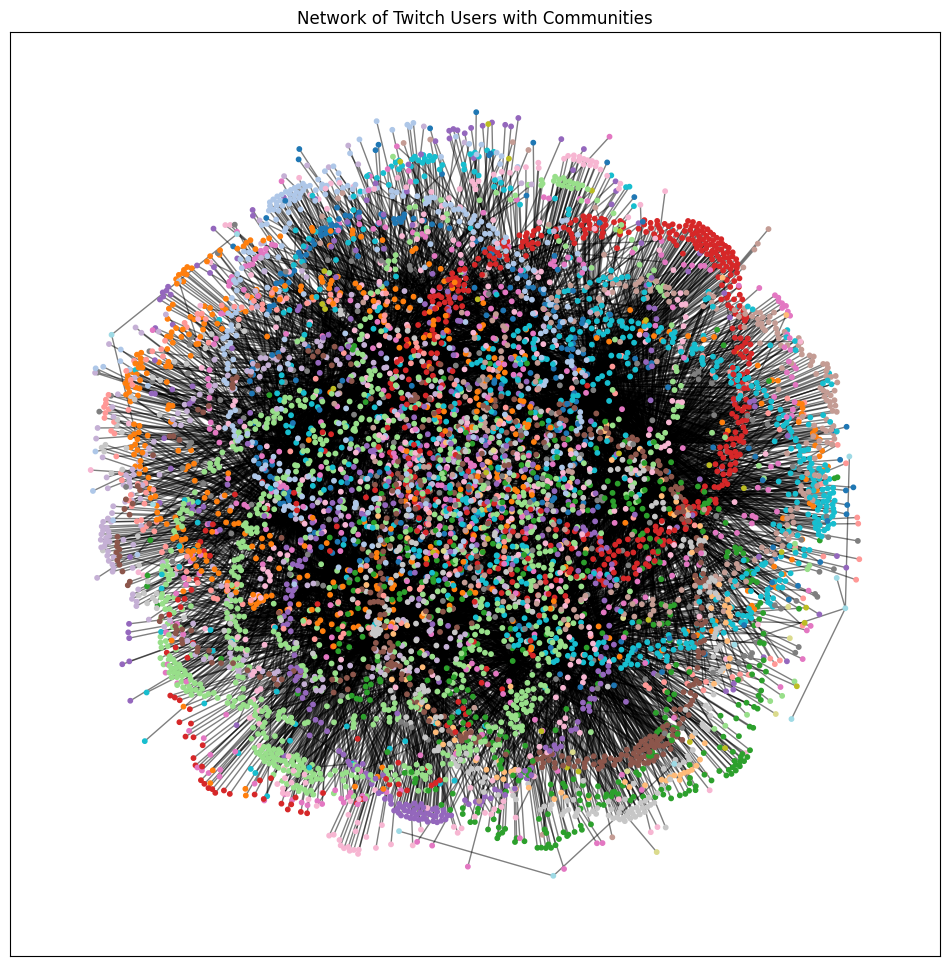

In [10]:
# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)  # positions for all nodes

# Draw nodes with colors based on community
colors = [community_map[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=10)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Show plot
plt.title("Network of Twitch Users with Communities")
plt.show()